Obróbka danych:
Pobrane dane obejmują 4 pliki w formacie txt.

Wszystkie dane w pliku "samsung_train.txt" otwieram w MS Excel, gdzie zostały rozmieszczone w 561 kolumnach i 7352 wierszach. Nadaję im przykładowe nazwy kolumn "col_1", "col_2", .... "col_561", a kolumnie z etykietami - "label", które pobrałam z pliku "samsung_train_labels.txt". Plik w formacie xlsx zapisuję pod nazwą "samsung.xlsx". Wszystkie dane z pliku "samsung_test.txt" otwieram w MS Excel, uzupełniam o dane z "samsung_test_labels.txt" i dodaję do pliku "samsung.xlsx".

Oba pliki, z danymi testowymi i treningowymi, łączę w jeden, ponieważ w Unsupervised Learning nie ma potrzeby pomniejszać zbioru treningowego o dane testowe. Trenowane będą wszystkie dane (na części całego zbioru), a model będzie testowany na różnych danych testowych wyznaczonych z całego zbioru.

Na potrzeby poniższego zadania będę analizować dane z wybranych kolumn, a nie wszystkie.

In [264]:
import pandas as pd
tel = pd.read_excel('samsung.xlsx')
tel

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_553,col_554,col_555,col_556,col_557,col_558,col_559,col_560,col_561,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [405]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, col_1 to label
dtypes: float64(561), int64(1)
memory usage: 44.2 MB


In [406]:
X.describe()

,col_1,col_2
count,10299.000000,10299.000000
mean,0.274347,-0.017743
std,0.067628,0.037128
min,-1.000000,-1.000000
25%,0.262625,-0.024902
50%,0.277174,-0.017162
75%,0.288354,-0.010625
max,1.000000,1.000000


# Clustering

In [407]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [480]:
features = ['col_1', 'col_2']
target = ['label']

X, y = tel[features], tel[target]

Przykład podziału danych w przypadku Supervised Learning oraz Clusteringu

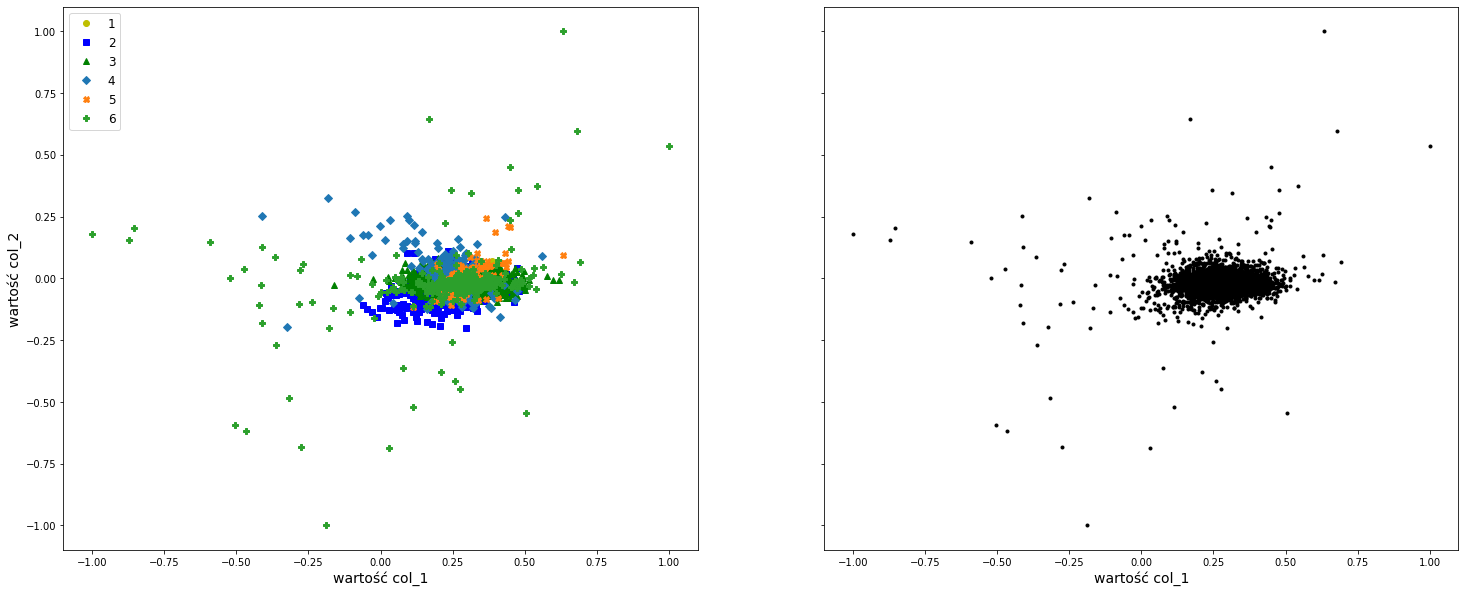

In [481]:
plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.plot(tel['col_1'][tel['label']==1], tel['col_2'][tel['label']==1], "yo", label="1")
plt.plot(tel['col_1'][tel['label']==2], tel['col_2'][tel['label']==2], "bs", label="2")
plt.plot(tel['col_1'][tel['label']==3], tel['col_2'][tel['label']==3], "g^", label="3")
plt.plot(tel['col_1'][tel['label']==4], tel['col_2'][tel['label']==4], "D", label="4")
plt.plot(tel['col_1'][tel['label']==5], tel['col_2'][tel['label']==5], "X", label="5")
plt.plot(tel['col_1'][tel['label']==6], tel['col_2'][tel['label']==6], "P", label="6")
plt.xlabel("wartość col_1", fontsize=14)
plt.ylabel("wartość col_2", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(tel['col_1'], tel['col_2'], c="k", marker=".")
plt.xlabel("wartość col_1", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

Po lewej stronie widać zbiór danych dwóch kolumn "col_1" i "col_2" w podziale na 6 klas wartości y, czyli kolumny "label" . Z prawej graficzny rozkład danych w klasteringu bez rozdziału na klasy.

In [482]:
def plot_clusters(X, y):
  plt.figure(figsize=(4, 4))
  plt.scatter(tel['col_1'], tel['col_2'], c="k", s=1)
  plt.xlabel("$x_1$", fontsize=15)
  plt.ylabel("$x_2$", fontsize=15, rotation=0)
  plt.grid()

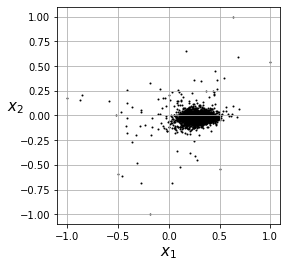

In [483]:
plot_clusters(X, y)

Podzielenie zbioru danych na klastry

In [484]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=6)

y_pred = clf.fit_predict(X)
print(y_pred)

[0 0 0 ... 1 3 5]


In [485]:
def plot_data(X):
    plt.plot(tel['col_1'], tel['col_2'], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
  
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(tel['col_1'], tel['col_2'], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


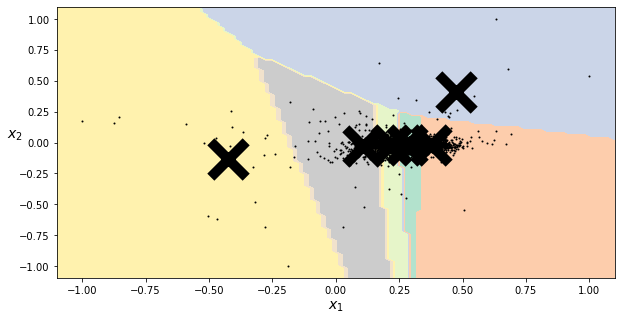

In [486]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [487]:
clf.cluster_centers_

array([[ 0.28005396, -0.01730406],
       [ 0.3740187 , -0.01816031],
       [ 0.475211  ,  0.4051524 ],
       [ 0.21684065, -0.01989732],
       [-0.42432167, -0.13600763],
       [ 0.10899903, -0.02547362]])

Z powyższego klarują się trzy, cztery centra. Niestety nie widać wyraźnie rozgraniczonych sześciu klas wartości z kolumny "label".
Poniżej wyrysowanie podziału dla pierwszych trzech kroków wyznacznia grup (clusteringu).

In [489]:
clf_1 = KMeans(n_clusters=6, max_iter=1, init="random", n_init=1, algorithm="full", random_state=4)
clf_2 = KMeans(n_clusters=6, max_iter=2, init="random", n_init=1, algorithm="full", random_state=4)
clf_3 = KMeans(n_clusters=6, max_iter=3, init="random", n_init=1, algorithm="full", random_state=4)
clf_300 = KMeans(n_clusters=6, max_iter=300, init="random", n_init=1, algorithm="full", random_state=4)
clf_1.fit(X)
clf_2.fit(X)
clf_3.fit(X)
clf_300.fit(X)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=6, n_init=1, random_state=4)

Wizualiacja grupowania danych w poszczególnych krokach clusteringu

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


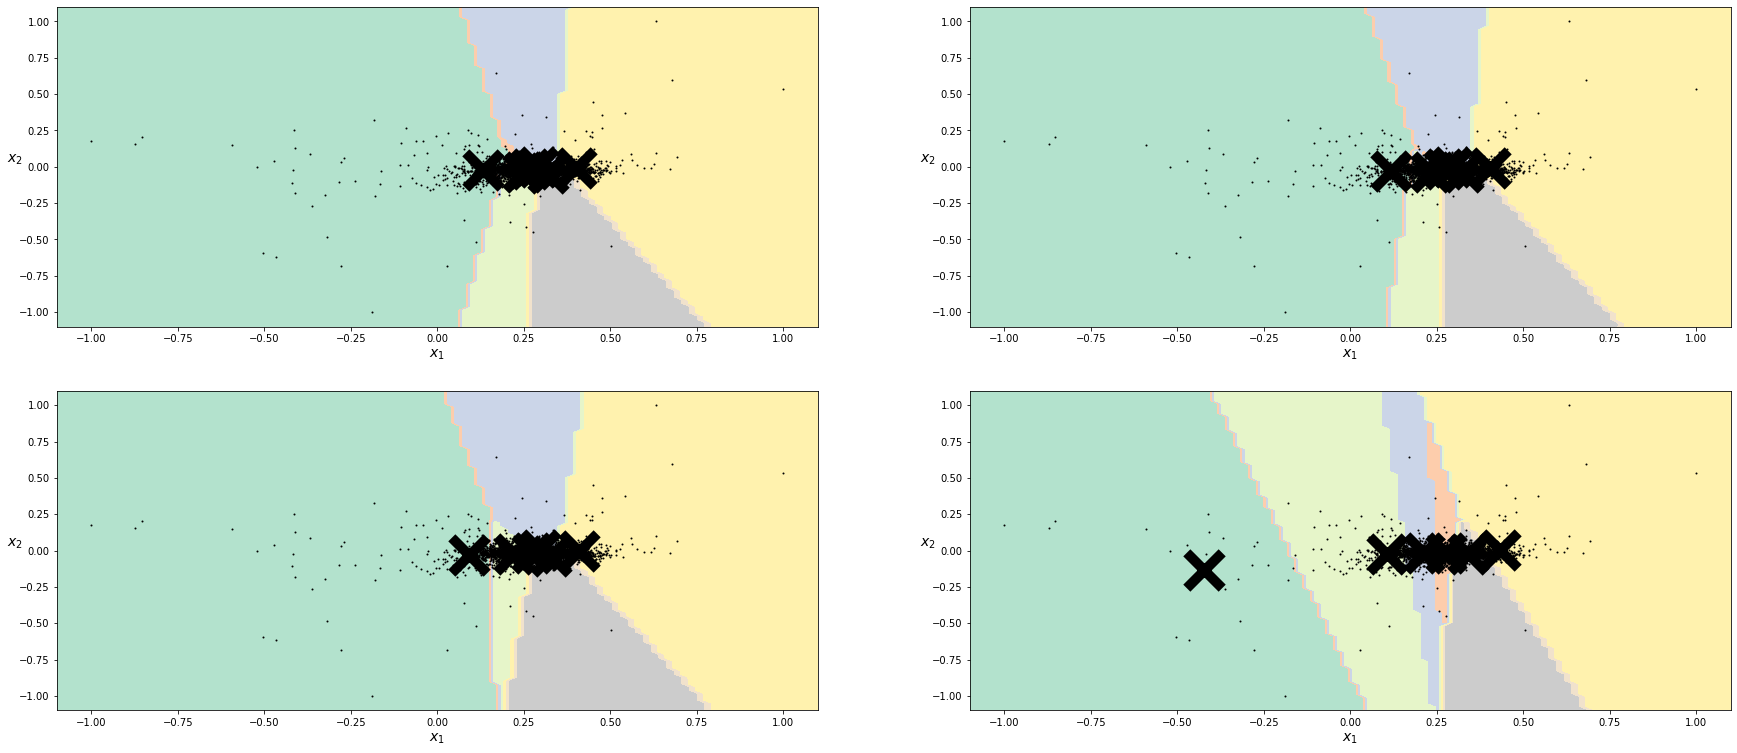

In [490]:
plt.figure(figsize=(30, 20))

plt.subplot(321)
plot_decision_boundaries(clf_1, X)

plt.subplot(322)
plot_decision_boundaries(clf_2, X)

plt.subplot(323)
plot_decision_boundaries(clf_3, X)

plt.subplot(324)
plot_decision_boundaries(clf_300, X)
plt.show()

Algorytm z każdym krokiem poprawia swoje działanie

Podział zbioru za pomocą stratyfikacji

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=8239, 1=8239, Test: 0=2060, 1=2060


Skalowanie danych

In [492]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Użycie metody kroswalidacji do sprawdzenia działania modelu na różnych podziałach

In [493]:
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = SGDClassifier(random_state=1)

cv_score = cross_val_score(clf, X, y, cv=5)
print("wynik kroswalidacji: ", cv_score)
print("średni wynik wszystkich foldów: ", cv_score.mean())

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wynik kroswalidacji:  [0.26553398 0.14417476 0.18252427 0.15194175 0.18504128]
średni wynik wszystkich foldów:  0.18584320789147338


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KMeans - dobranie ilości klastrów

Stworzenie tablicy z klasyfikatorami; 14 algorytmów

In [421]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 15)
]

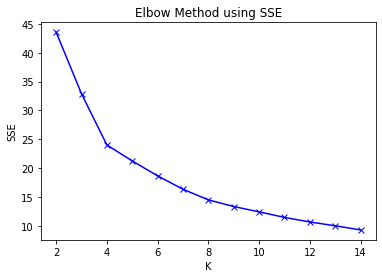

In [494]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 15), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

Punkt przegięcia jest na 4 klastrze, czyli ilość klastrów jest zgodna z widoczną na wcześniejszej wizualizacji.

# Preprocessing danych z użyciem KMeans

KMeans można użyć do wstępnego przetwarzania danych, aby zwiększyć skuteczność użytego klasyfikatora

In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # podział na dane treningowe i testowe

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2) # użycie klasyfikatora LogisticRegression
log_reg.fit(X_train, y_train)
print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40, random_state=2)), # ilość klastrów znacznie większa od ilości klas w zbiorze
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)),
])
pipeline.fit(X_train, y_train)
print("Z KMeans :", pipeline.score(X_test, y_test))

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bez KMeans : 0.1821359223300971


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Z KMeans : 0.32932038834951455


Wynik znacząco się poprawił

# DBSCAN

In [496]:
features = ['col_1', 'col_2']
target = ['label']

X, y = tel[features], tel[target]

In [497]:
from sklearn.cluster import DBSCAN

# pierwszy klasyfikator DBSCAN z eps = 0.05
dbscan = DBSCAN(eps=0.05, min_samples=6)
dbscan.fit(X)

# drugi DBSCAN z eps = 0.2 (większy epsilon, większa przestrzeń wokół)
dbscan_2 = DBSCAN(eps=0.3, min_samples=6)
dbscan_2.fit(X)

DBSCAN(eps=0.3, min_samples=6)

Użycie KMeans z bardzo dużą ilością iteracji

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


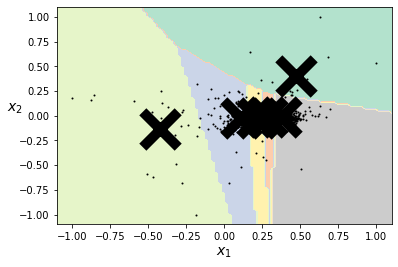

In [498]:
KMeans_clf = KMeans(n_clusters=6, max_iter=100000)
KMeans_clf.fit(X)

plot_decision_boundaries(KMeans_clf, X)

Z powyższego wynika, że bez wzgledu na ilość iteracji algorytm nie jest w stanie dla analizowanego zbioru danych podzielić go dokładnie, lecz przedstawia zbliżony podział, zbieżny do zaprezentowanego na wcześniejszych grafikach.

# Gaussian Mixture Models (GNN)

In [505]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Podobnie, jak w przypadku KMeans, w GMM również trzeba określić pożądaną ilość klastrów, za pomocą parametru n_components
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=6, n_init=10, random_state=42)

In [506]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(tel['col_1'], tel['col_2'], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Temp\ipykernel_47688\1466963344.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
C:\Users\marta.zegota\AppData\Local\Temp\ipykernel_47688\1466963344.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


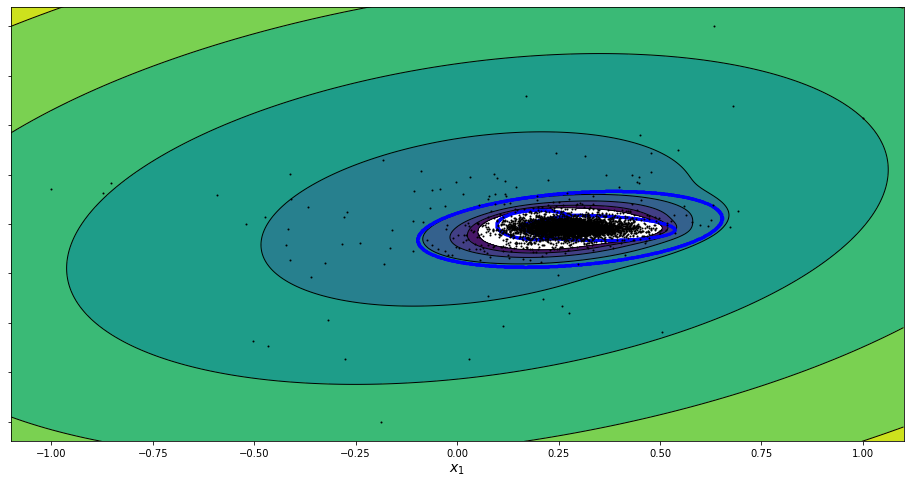

In [507]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

Powyższe elipsoidalne kształty w różnych kolorach są wartościami rozkładu Gaussa - wskazują z jakim prawdopodobieństwem dany element należy do danego klastra. Im ciemniejszy kolor, tym wieksza pewność.

Poniżej wizualizacja wydzielonych klastrów w kształcie bagietek (zmiana kształtu poprzez zdefiniowanie hiperparametru covariance_type)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\marta.zegota\AppData\Local\Temp\ipykernel_47688\1466963344.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
C:\Users\marta.zegota\AppData\Local\Temp\ipykernel_47688\1466963344.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


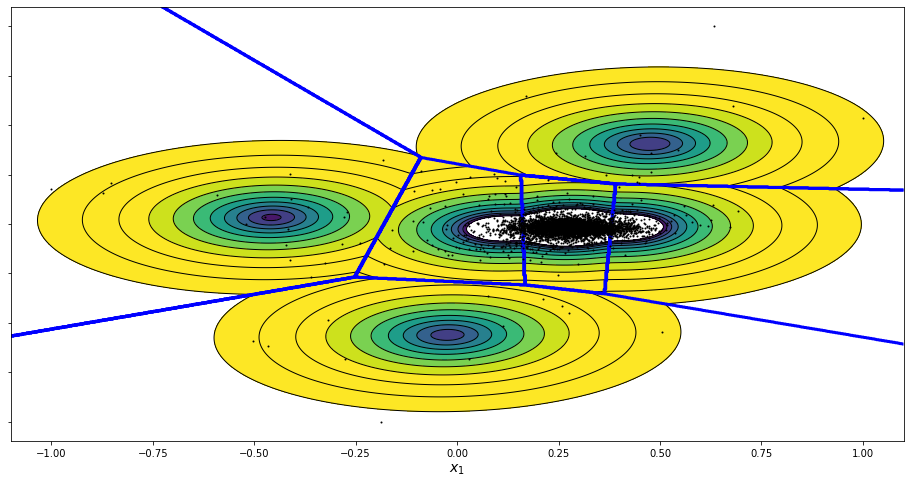

In [502]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42, covariance_type="tied")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

W celu sprawdzenia, do jakiej grupy należą nowe elementy należy użyć metody predict()

In [508]:
gm.predict(X_test)

array([3, 3, 2, ..., 2, 2, 3], dtype=int64)

Powyższe wskazuje na cechy 2 "wchodzenie po schodach" i 3 "schodzenie po schodach". Wartości zmiennych objaśniających X dla klas 1 "marsz", 4 "siedzenie", 5 "stanie" i 6 "leżenie" są bardziej rozproszone/trudniejsze do zarządzenia przez algorytm grupowania.

# Czym różni się KMeans, K-fold i K Nearest Neighbors?

KMeans - algorytm służący do klastrowania danych; parametrem algorytmu jest ilość klastrów, które ma znaleźć i do których ma przyporządkować dane.

KFold - model służący do dzielenia danych na testowe i treningowe w ramach k zdefiniowanych ilości zestawów (foldów) danych; wykorzystywany w kroswalidacji.

Unsupervised Nearest Neighbors - algorytm służacy do klastrowania danych na podstawie odległości od wszystkich obserwacji ze zbioru. Celem jest znalezienie wstępnie zdefiniowanej liczby próbek treningowych znajdujących się najbliżej nowego punktu i przewidzenie na ich podstawie etykiety.

# Dwa wybrane klasyfikatory typu Supervised Learning i ich wyszkolenie

In [509]:
features = ['col_1']
target = ['label']

X, y = tel[features], tel[target]

In [510]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 8239
Testowe obserwacje: 2060


1. Regresja logistyczna

In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


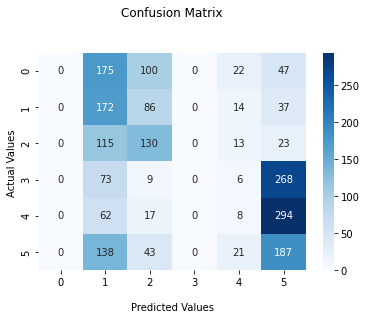

In [512]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

predictions_lr = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [513]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

random_lr = LogisticRegression()
params_rf = {'C': [1.0, 2.0, 3.0, 4.0],
             'max_iter': [50, 100, 130, 180]}
rf_gridsearch = GridSearchCV(random_lr,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'C': 4.0, 'max_iter': 50}


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


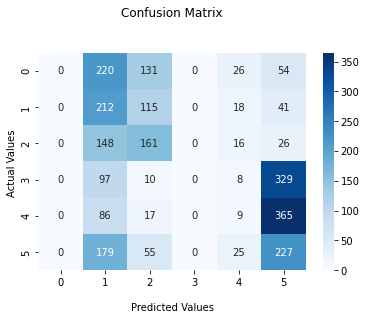

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions_lr = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [514]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       344
           2       0.23      0.56      0.33       309
           3       0.34      0.46      0.39       281
           4       0.00      0.00      0.00       356
           5       0.10      0.02      0.03       381
           6       0.22      0.48      0.30       389

    accuracy                           0.24      2060
   macro avg       0.15      0.25      0.18      2060
weighted avg       0.14      0.24      0.17      2060



C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Z wartości F1 score można wyciągnąć wniosek, że model dobrze przewiduje wartości dla klasy 2 "wchodzenie po schodach", 3 "schodzenie po schodach" i 6 "leżenie", natomiast zdecydowanie gorzej jest z pozostałymi klasami. 

2. KNN

In [523]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.05))
model_knn.fit(X_train_standardized, y_train)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=411)

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


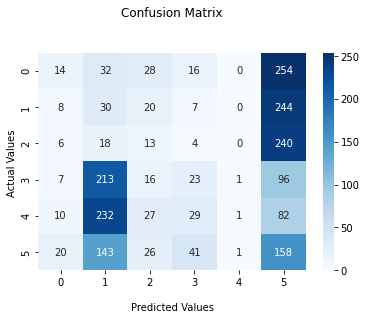

In [524]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr1 = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr1)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [525]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)

random_knn = KNeighborsClassifier()
params_rf = {'n_neighbors': [1, 5, 10, 15],
             'leaf_size': [5, 10, 15, 30]}
rf_gridsearch = GridSearchCV(random_knn,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'leaf_size': 15, 'n_neighbors': 10}


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


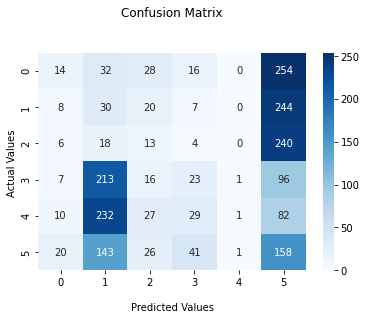

In [526]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr1 = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr1)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [530]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_lr1))

              precision    recall  f1-score   support

           1       0.22      0.04      0.07       344
           2       0.04      0.10      0.06       309
           3       0.10      0.05      0.06       281
           4       0.19      0.06      0.10       356
           5       0.33      0.00      0.01       381
           6       0.15      0.41      0.22       389

    accuracy                           0.12      2060
   macro avg       0.17      0.11      0.09      2060
weighted avg       0.18      0.12      0.09      2060



Z powyższych wartości F1 score można wyciągnąć wniosek, że model KNN bardzo słabo przewiduje. Zdecydowanie lepiej radzi sobie regresja logistyczna.